In [ ]:
# python -m pip install matplotlib numpy scipy
#

In [28]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math

In [29]:
def getDataFromCSV(file_name, x, y):
    with open(file_name, 'r') as file:
        file.readline()

        for line in file:
            print(line)
            values = line.split(',')
            x.append(float(values[0]))
            y.append(float(values[1]))

In [30]:
def mnk(x : np.array, y : np.array):
    mean_x   = np.mean(x)
    mean_y   = np.mean(y)
    mean_xy  = np.mean(x * y)
    mean_xsq = np.mean(x * x)
    mean_ysq = np.mean(y * y)

    print('x:   ', mean_x)
    print('y:   ', mean_y)
    print('xy:  ', mean_xy)
    print('x^2: ', mean_xsq)
    print('y^2: ', mean_ysq)


    k = (mean_xy - mean_x * mean_y) / (mean_xsq - mean_x ** 2)
    b = mean_y - k*mean_x

    print('k =', k)
    print('b =', b)

    delta_k = 1 / np.sqrt(len(x)) * np.sqrt((mean_ysq - mean_y**2)/(mean_xsq - mean_x**2) - k*k)
    print('delta_k = ', delta_k)

    delta_b = delta_k * np.sqrt(mean_xsq - mean_x ** 2)
    print('delta_b = ', delta_b)

    print('\n')

    n = len(x)

    return [k, b]

def plot_linear(x : np.array, y : np.array, col_index : int, label):
    color = plt.cm.tab10(col_index)

    coeffs = mnk(x, y)
    plt.plot(x, y, 'o', color = color)

    x = np.linspace(min(x), max(x), 3)
    plt.plot(x, coeffs[0] * x + coeffs[1], color = color, label=label)

# Лаба 3.2.6 -- изучение гальванометра

## А. определение динамической постоянной

I =  [6.439024390243903e-08, 5.617021276595745e-08, 4.981132075471698e-08, 4.474576271186441e-08, 4.0615384615384617e-08, 3.7183098591549296e-08, 3.428571428571429e-08, 3.1807228915662655e-08, 2.966292134831461e-08, 2.7789473684210527e-08, 2.613861386138614e-08]
delta_I =  [4.87804878e-10 4.25531915e-10 3.77358491e-10 3.38983051e-10
 3.07692308e-10 2.81690141e-10 2.59740260e-10 2.40963855e-10
 2.24719101e-10 2.10526316e-10 1.98019802e-10]
delta_x =  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


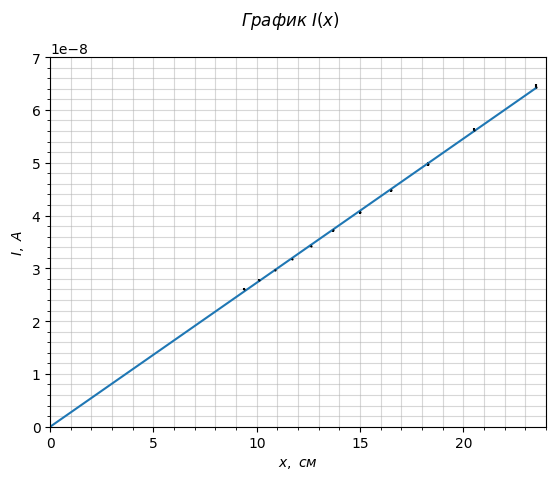

In [35]:
R =    [20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50] # кОм
R =    [R[i] * 1000 for i in range(len(R))] # Ом
x =    [23.5, 20.5, 18.3, 16.5, 15.0, 13.7, 12.6, 11.7, 10.9, 10.1, 9.4]
delta_x = [0.01] * len(x)
# sigma_x = [None]*11
# I =       [None]*11
# sigma_I = [None]*11

R21 = 1000
R2 = 1e4 # ом
U0 = 1.32 # B
dU = 0.01 # B
R0 = 500 # Ом

I = [U0 / (R[i] + R0) / R21 for i in range(len(R))]

delta_I = [I[i]* dU/U0 for i in range(len(I))]

print("I = ", I)

I = np.array(I)
x = np.array(x)
delta_I = np.array(delta_I)
delta_x = np.array(delta_x)
print("delta_I = ", delta_I)
print("delta_x = ", delta_x)

# plot_linear(x, I, 1, '')


coeffs = np.polyfit(x, I, 1)  # линейная аппроксимация
a, b = coeffs  # I = a*x + b

x_fit = np.linspace(0, max(x), 100)
I_fit = a*x_fit + b

plt.errorbar(
    x, I,
    xerr=delta_x,
    yerr=delta_I,
    fmt= 'k.',
    # capsize=4,
    markersize=1,
    label='Эксперимент'
)

# plt.plot(x, I, 'o', markersize = 3, label='Данные')
plt.plot(x_fit, I_fit, '-', label='Линейная аппроксимация')

plt.suptitle('$ График\\  I(x) $')
plt.xlabel('$ x,\\ см $')
plt.ylabel('$ I,\\ А $')

plt.xlim(0, 24)
plt.ylim(0, 7e-8)

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()


In [32]:
k = 2.7289767167398584e-09
b = -3.640728909559588e-12
delta_k =  1.73151155748781e-11
delta_b =  7.483060257007933e-11

a = 1.16 # м
delta_a = 0.05 # м

# phi = [x[i] / 2 / a for i in range(len(x))]

C_I = 2 * a * k / 10 # C_I = 2 * a * I/x

delta_C_I = C_I * sqrt((delta_a/a) ** 2 + (delta_k/k) ** 2)

S_I = 1 / C_I

delta_S_I = S_I * delta_C_I / C_I

print("C_I = ", C_I, 'delta C_I = ', delta_C_I)
print("S_I = ", S_I, 'delta S_I = ', delta_S_I)



C_I =  6.331225982836472e-10 delta C_I =  2.7583845620233294e-11
S_I =  1579472921.5335748 delta S_I =  68814377.10015522


## Б. определение критического сопротивления гальванометра

In [39]:
Theta_0 = 0.21
N =       [3, 4, 5, 6, 7, 8, 9, 10]
R     =   [22, 28, 37, 45, 52, 60, 67, 75]
x_n =     [21.1, 15.8, 20.7, 17.2, 15.0, 13.1, 17.3, 21.8]
x_n1 =    [15.8,  3.2,  5.1,  5.4,  5.3,  7.3,  7.2,  9.2]
Theta =   [2.13, 1.59, 1.40, 1.15, 1.04, 0.96, 0.87, 0.86]

delta_theta = [Theta[i] * sqrt((delta_x[i]/x_n[i])**2 + (delta_x[i]/x_n1[i])**2) for i in range(len(x_n))]
R_21 =    [1/1000, 1/1000, 1/500, 1/500, 1/500, 1/300, 1/300, 1/200]

print("delta_theta = ", delta_theta)


delta_theta =  [0.0016841687012072544, 0.005069632614700118, 0.002827186496870226, 0.0022321188451677365, 0.002081151534412792, 0.0015054689578966234, 0.0013088040231284406, 0.0010146157678031797]


a = 0.082 ± 0.005
b = 1.652 ± 0.278
Covariance matrix:
 [[ 2.94246867e-05 -1.41974113e-03]
 [-1.41974113e-03  7.75340495e-02]]


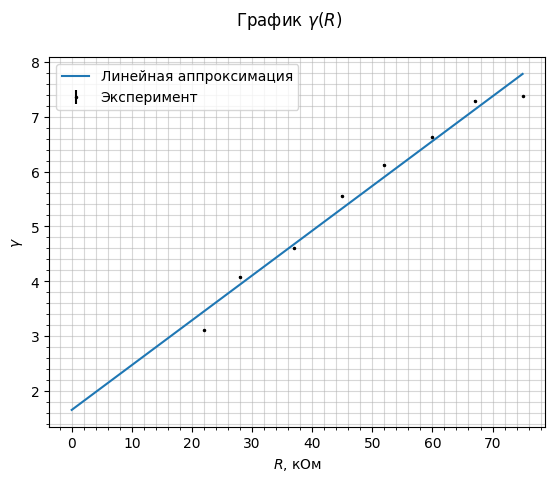

In [54]:
gam = [sqrt(4 * np.pi ** 2 / i ** 2 + 1) for i in Theta]
delta_gam = [gam[i] * delta_theta[i] / Theta[i] for i in range(len(Theta))]
gam = np.array(gam)

coeffs, cov = np.polyfit(R, gam, 1, cov = True)  # аппроксимация
a, b = coeffs

R_fit = np.linspace(0, max(R), 200)  # диапазон для прямой
gam_fit = a*R_fit + b                # значения по прямой

sigma_a = np.sqrt(cov[0,0])  # стандартная ошибка наклона
sigma_b = np.sqrt(cov[1,1])  # стандартная ошибка свободного члена

print(f"a = {a:.3f} ± {sigma_a:.3f}")
print(f"b = {b:.3f} ± {sigma_b:.3f}")
print("Covariance matrix:\n", cov)

plt.errorbar(
    R, gam,
    yerr=delta_gam,
    fmt='k.',
    markersize=3,
    label='Эксперимент'
)
plt.plot(R_fit, gam_fit, '-', label='Линейная аппроксимация')

plt.suptitle(r'График $ \gamma(R) $')
plt.xlabel(r'$R$, кОм')
plt.ylabel(r'$\gamma$')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()



In [59]:
print("delta_R_cr = ", (1/a*1000 - R0) * 0.06)

delta_R_cr =  704.3079820499677


из этой : \
![image1.png](image1.png) \
и этой: \
![image2.png](image2.png) \
формул
следует следующее: \
![image3.png](image3.png)

формулы.

In [41]:
R_kr = [(R[i] * 1000 + R0)/sqrt((2 * np.pi/Theta[i]) ** 2 + 1) - R0 for i in range(len(R))]
R_kr = [R_kr[i] * 1e-3 for i in range(len(R))]

den = [sqrt((2 * np.pi/Theta[i])**2 + 1) for i in range(len(Theta))]

eps_R_kr = [sqrt((-(R[i] + R0) * (2*np.pi)**2 / (Theta[i]**3 * den[i]**3))**2) for i in range(len(Theta))]
delta_R_kr = [R_kr[i] * eps_R_kr[i] * 1e-3 for i in range(len(R_kr))]
print("R_kr = ", R_kr)
print("delta_R_kr = ", delta_R_kr)

R_kr =  [6.723708318562525, 6.491713833808192, 7.6556338926018475, 7.691704391319115, 8.073212239215035, 8.637677589782282, 8.758045450279507, 9.738470255668576]
delta_R_kr =  [0.47449686216099907, 0.4970247404501593, 0.6084297407062811, 0.6350002970031722, 0.681079772276344, 0.7436565743681536, 0.7681372733640655, 0.8667369944619984]


## В. баллистический режим

In [42]:
def prop(x, A, B, C):
    return A / (x + B) + C

a = 4.060 ± 0.263
b = -2.159 ± 1.833


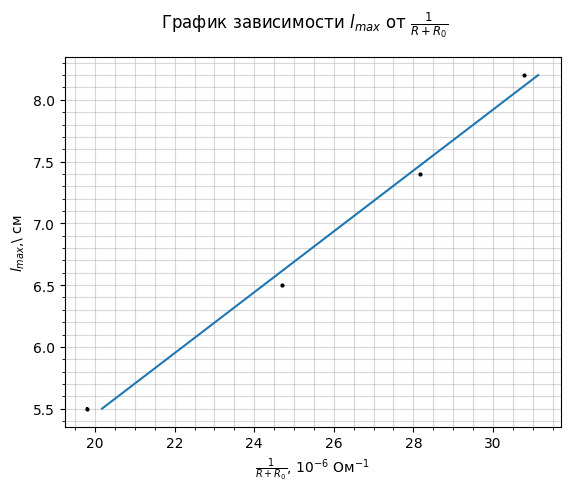

In [43]:
R_dyn =     [50, 40, 35, 32]
l_max =  [5.5, 6.5, 7.4, 8.2]

delta_l_max = [delta_x[i] for i in range(len(l_max))]
R_dyn = [1/(R_dyn[i] * 1e3 + R0) * 1e6 for i in range (len(R_dyn))]
# R_dyn = [(R_dyn[i] * 1e3 + R0) for i in range(len(R_dyn))]


R_dyn = np.array(R_dyn)
l_max = np.array(l_max)
# delta_R_dyn = np.array(delta_R_dyn)
delta_l_max = np.array(delta_l_max)

# plot_linear(x, I, 1, '')


# линейная аппроксимация с матрицей ковариаций
coeffs, cov = np.polyfit(l_max, R_dyn, 1, cov=True)
a, b = coeffs  # наклон и сдвиг

# погрешности = sqrt(diag(cov))
sigma_a, sigma_b = np.sqrt(np.diag(cov))

print(f"a = {a:.3f} ± {sigma_a:.3f}")
print(f"b = {b:.3f} ± {sigma_b:.3f}")

l_fit = np.linspace(min(l_max), max(l_max), 1000)
R_fit = a*l_fit + b



plt.errorbar(
    R_dyn, l_max,
    yerr=delta_l_max,
    # yerr=delta_I,
    fmt= 'k.',
    # capsize=4,
    # linestyle = '-',
    markersize=4,
    label='Эксперимент'
)


x2 = np.linspace(0, 2e-3, 1000)

# plt.plot(f1, phi1, 'o', color=plt.cm.tab10(0), label = '$ R = R_1 = 408\\ Ом $')
# popt, pcov = curve_fit(prop, R_dyn, l_max, p0=[1000, 1, 5], maxfev=20000)
# A, B, C = popt
# print("popt = ", popt)
# plt.plot(x2, prop(x2, *popt), color=plt.cm.tab10(0))

# plt.plot(x, I, 'o', markersize = 3, label='Данные')
plt.plot(R_fit, l_fit, '-', label='Линейная аппроксимация')

plt.suptitle((r"График зависимости $l_{max}$ от $\frac{1}{R + R_0}$"))
plt.xlabel(r"$\frac{1}{R + R_0}$, $10^{-6}$ Ом$^{-1}$")
plt.ylabel('$ l_{max}$,\\ см')

# plt.xlim(0, 2e-3)
# plt.ylim(0, 9)

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()


используя следующее соотношение: \
![image4.png](image4.png) \
и учитывая поправку: \
![image5.png](image5.png) \
необходимо определить по графику критическое сопротивление гальванометра.

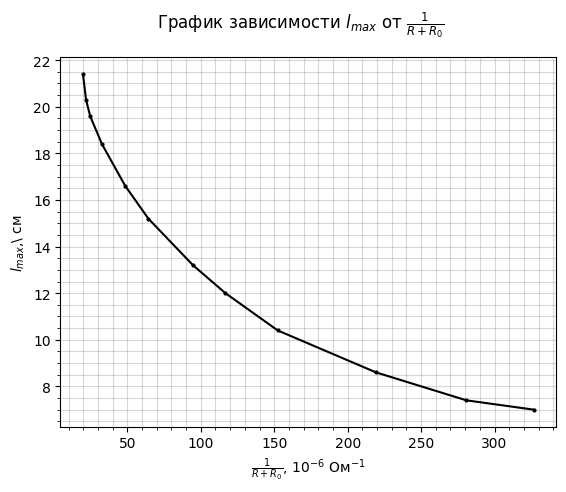

In [44]:
# R в кОм
R3 = np.array([50, 45, 40, 30, 20, 15, 10, 8, 6, 4, 3, 2.5])

# 1 / (R + R0), 10^-6 Ом^-1
inv_R = np.array([19.8, 21.9, 24.7, 32.7, 48.6, 64.3,
                  94.7, 116.8, 152.4, 219.3, 280.9, 326.8])

# l_max в см
l_max = np.array([21.4, 20.3, 19.6, 18.4, 16.6, 15.2,
                  13.2, 12.0, 10.4, 8.6, 7.4, 7.0])

delta_l_max = [0.01] * len(l_max)

inv_R = np.array(inv_R)
l_max = np.array(l_max)
# delta_inv_R = np.array(delta_inv_R)
delta_l_max = np.array(delta_l_max)

# plot_linear(x, I, 1, '')


# coeffs = np.polyfit(l_max, inv_R, 1)  # линейная аппроксимация
# a, b = coeffs  # I = a*x + b

# x_fit = np.linspace(0, max(x), 100)
# I_fit = a*x_fit + b

plt.errorbar(
    inv_R, l_max,
    yerr=delta_l_max,
    # yerr=delta_I,
    fmt= 'k.',
    # capsize=4,
    linestyle = "-",
    markersize=4,
    label='Эксперимент'
)

# plt.plot(x, I, 'o', markersize = 3, label='Данные')
# plt.plot(x_fit, I_fit, '-', label='Линейная аппроксимация')
x2 = np.linspace(0, 2e-3, 1000)

# # plt.plot(f1, phi1, 'o', color=plt.cm.tab10(0), label = '$ R = R_1 = 408\\ Ом $')
# par, _ = curve_fit(f=prop, xdata=inv_R, ydata=l_max)
# print(par)
# plt.plot(x2, prop(x2, *par), color=plt.cm.tab10(0))


plt.suptitle((r"График зависимости $l_{max}$ от $\frac{1}{R + R_0}$"))
plt.xlabel(r"$\frac{1}{R + R_0}$, $10^{-6}$ Ом$^{-1}$")
plt.ylabel('$ l_{max}$,\\ см')

# plt.xlim(0, 2e-3)
# plt.ylim(0, 9)

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()


x:    56.375
y:    6.529260950218088
xy:   401.8203858083669
x^2:  3608.375
y^2:  45.29916998308089
k = 0.07840679801520323
b = 2.109077712111006
delta_k =  0.0025851137843604316
delta_b =  0.0536206676006639




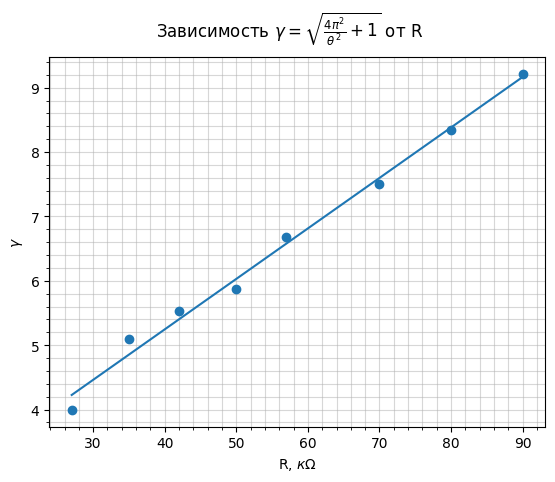

In [60]:
R = np.array([27.0, 35.0, 42.0, 50.0, 57.0, 70.0, 80.0, 90.0]) * 1000
theta = np.array([1.625, 1.256, 1.154, 1.087, 0.951, 0.845, 0.759, 0.686])
sigma_theta = 0.2 * np.sqrt(2) / 20

lhs = np.sqrt( ((4 * np.pi**2) / (theta ** 2)) + 1 )

plot_linear(R * 1e-3, lhs, 0, '')
# plt.errorbar(R*1e-3, lhs, 0, (sigma_theta / theta) * lhs)

plt.suptitle(r'Зависимость $\gamma = \sqrt{\frac{4\pi^2}{\theta^2} + 1}$ от R')
plt.ylabel(r'$\gamma$')
plt.xlabel(r'R, $к\Omega$')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()

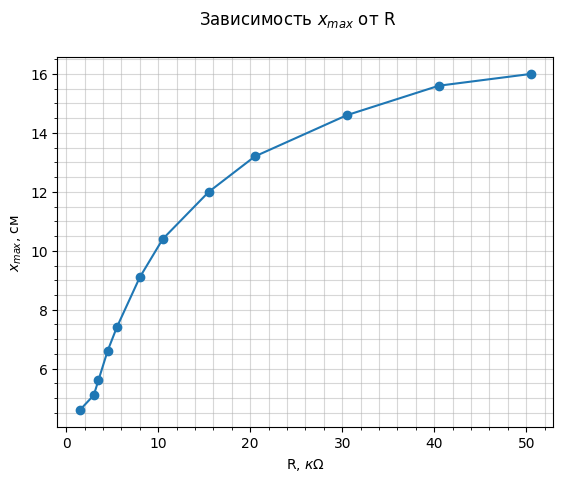

In [61]:
R = np.array([50.0, 40.0, 30.0, 20.0, 15.0, 10.0, 7.5, 5.0, 4.0, 3.0, 2.5, 1.0]) * 1e3
x = np.array([16.0, 15.6, 14.6, 13.2, 12.0, 10.4, 9.1, 7.4, 6.6, 5.6, 5.1, 4.6])

# lin_x = np.linspace(0, 50000, 1000)

plt.plot((R + 500) * 1e-3, x, 'o', color = plt.cm.tab10(0))
plt.plot((R + 500) * 1e-3, x, color = plt.cm.tab10(0))

plt.suptitle(r'Зависимость $x_{max}$ от R')
plt.ylabel(r'$x_{max}$, см')
plt.xlabel(r'R, $к\Omega$')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()

In [68]:
print("C = ", C)
C_q = 2 * a * C * U0 / (1000 * x_max)

# относительные погрешности
delta_a = 0.01     # 1% например
delta_U0 = 0.002   # 0.01%
delta_xmax = 0.01 # 0.1%

delta_Cq = (delta_a**2 + delta_C**2 + delta_U0**2 + delta_xmax**2)**0.5
sigma_Cq = C_q * delta_Cq

print("C_q =", C_q, "+/-", sigma_Cq)

C =  2e-06
C_q = 4.494027139385561e-12 +/- 6.800697099462142e-14


In [ ]:
print(R0 * C, delta_Cq * R0 * C)(

0.001 1.5132745950421555e-05
